In [886]:
import pandas as pd
import matplotlib.pyplot as plt

In [887]:
billDF=pd.read_csv(r'hot-100-current.csv',encoding = 'cp949')

In [888]:
billDF.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen,1.0,1,3
1,2024-06-08,2,Not Like Us,Kendrick Lamar,2.0,1,4
2,2024-06-08,3,Million Dollar Baby,Tommy Richman,3.0,2,5
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey,4.0,3,7
4,2024-06-08,5,Espresso,Sabrina Carpenter,6.0,4,7


In [889]:
## 분석에 관련없는 데이터 삭제

billDF.drop('last_week',axis=1,inplace=True)
billDF.drop('peak_pos',axis=1,inplace=True)
billDF.drop('wks_on_chart',axis=1,inplace=True)
billDF

,chart_week,current_week,title,performer
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen
1,2024-06-08,2,Not Like Us,Kendrick Lamar
2,2024-06-08,3,Million Dollar Baby,Tommy Richman
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey
4,2024-06-08,5,Espresso,Sabrina Carpenter
...,...,...,...,...
343595,1958-08-04,96,Over And Over,Thurston Harris
343596,1958-08-04,97,I Believe In You,Robert & Johnny
343597,1958-08-04,98,Little Serenade,The Ames Brothers
343598,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams


In [890]:
#2024년 데이터만 추출

bill=billDF[:2300]
bill['score']=0
bill['title']=bill['title'].str.lower()

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8136\1094406922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['score']=0
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8136\1094406922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['title']=bill['title'].str.lower()


In [891]:
for row in bill.index:
    bill.loc[row,'score']=101-bill.loc[row,'current_week']

In [892]:
bill_title=bill['title'].value_counts()
bill_title

title
feather                     23
stick season                23
agora hills                 23
greedy                      23
lovin on me                 23
                            ..
stranger                     1
wildflower and barley        1
scared of my guitar          1
best for me                  1
dj play a christmas song     1
Name: count, Length: 429, dtype: int64

In [893]:
bill_score=pd.DataFrame(index=['score'])
for name in bill_title.index:
    bill_score[name]=0
    for row in bill.index:
        if bill.loc[row,'title']==name:
            bill_score[name]=bill_score[name]+bill.loc[row,'score']

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8136\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8136\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8136\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

In [894]:
bill_score=bill_score.T
bill_score

,score
feather,1487
stick season,1930
agora hills,1862
greedy,1968
lovin on me,2142
...,...
stranger,26
wildflower and barley,13
scared of my guitar,11
best for me,8


In [895]:
streamDF=pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding='cp1252',thousands=',')

In [896]:
streamDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [897]:
youtube=streamDF[['Track','Artist','YouTube Views','YouTube Likes']]
youtube['Track']=youtube['Track'].str.lower()
youtube.set_index('Track',inplace=True)

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8136\4224539933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['Track']=youtube['Track'].str.lower()


In [898]:
dataDF=bill_score.join(youtube)
dataDF

,score,Artist,YouTube Views,YouTube Likes
feather,1487,Sabrina Carpenter,88126911.0,1378287.0
stick season,1930,Noah Kahan,89431811.0,659870.0
agora hills,1862,Doja Cat,48045203.0,986278.0
greedy,1968,Tate McRae,141646818.0,1514837.0
greedy,1968,Tate McRae,NaN,NaN
...,...,...,...,...
stranger,26,NaN,NaN,NaN
wildflower and barley,13,NaN,NaN,NaN
scared of my guitar,11,NaN,NaN,NaN
best for me,8,Joyner Lucas,18904500.0,468752.0


In [899]:
dataDF.dropna(inplace=True)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, feather to best for me
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          250 non-null    int64  
 1   Artist         250 non-null    object 
 2   YouTube Views  250 non-null    float64
 3   YouTube Likes  250 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.8+ KB


In [900]:
dataDF.corr(numeric_only=True)

,score,YouTube Views,YouTube Likes
score,1.000000,0.050898,0.137704
YouTube Views,0.050898,1.000000,0.924794
YouTube Likes,0.137704,0.924794,1.000000


In [901]:
# 한글 폰트 설정 => 폰트 매니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
Font_file=r'C:\Windows\Fonts\gulim.ttc'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=Font_file).get_name()

# 새로운 폰트 패밀리 이름지정
rc('font',family=font_name)

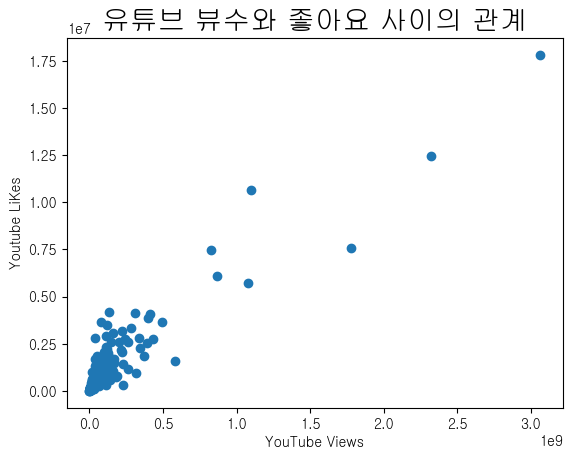

In [902]:
plt.scatter(dataDF['YouTube Views'],dataDF['YouTube Likes'])
plt.xlabel('YouTube Views')
plt.ylabel('Youtube LiKes')
plt.title('유튜브 뷰수와 좋아요 사이의 관계',fontsize=20)
plt.show()

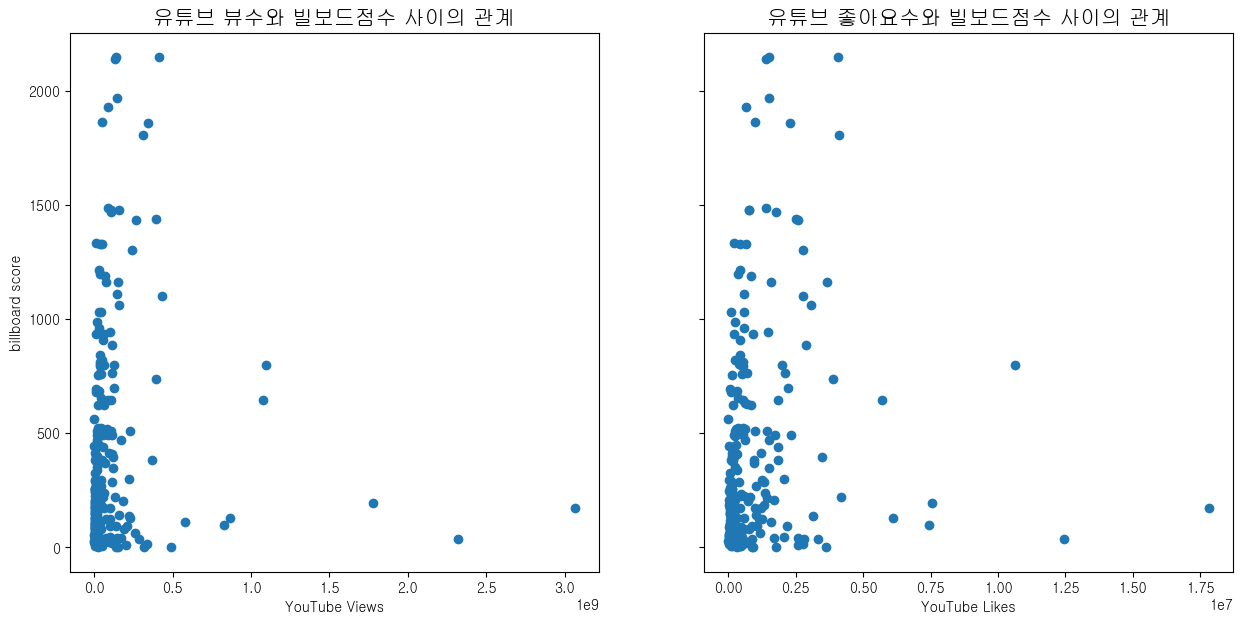

In [903]:
fig=plt.figure(figsize=(15,7))
billtube_1=fig.subplots(1,2,sharey=True)
billtube_1[0].scatter(dataDF['YouTube Views'],dataDF['score'])
billtube_1[0].set_xlabel('YouTube Views')
billtube_1[0].set_ylabel('billboard score')
billtube_1[0].set_title('유튜브 뷰수와 빌보드점수 사이의 관계',fontsize=15)

billtube_1[1].scatter(dataDF['YouTube Likes'],dataDF['score'])
billtube_1[1].set_xlabel('YouTube Likes')
billtube_1[1].set_title('유튜브 좋아요수와 빌보드점수 사이의 관계',fontsize=15)


plt.show()

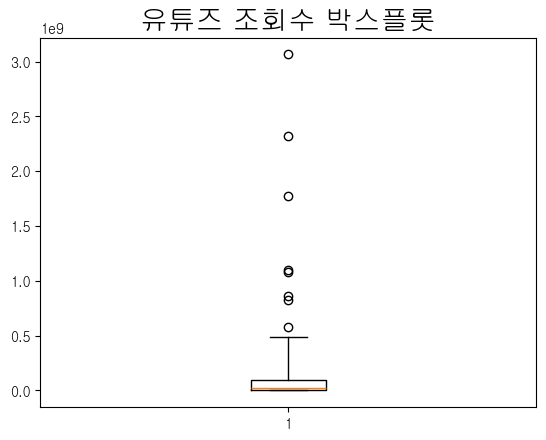

In [904]:
box_view=plt.boxplot(dataDF['YouTube Views'],whis=5)
plt.title('유튜즈 조회수 박스플롯',fontsize=20)
plt.show()

In [905]:
box_view['caps'][0].get_data()
view_up=list(box_view['caps'][1].get_data())[1][1]

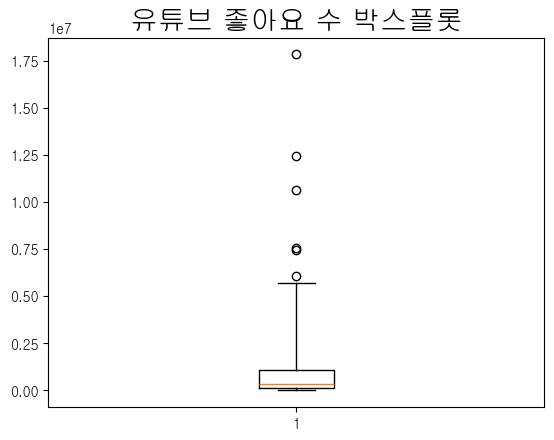

In [906]:
box_like=plt.boxplot(dataDF['YouTube Likes'],whis=5)
plt.title('유튜브 좋아요 수 박스플롯',fontsize=20)
plt.show()

In [907]:
box_like['caps'][0].get_data()
like_up=list(box_like['caps'][1].get_data())[1][1]

In [908]:
# 이상치 제거
bill_youtube=dataDF[(dataDF['YouTube Views']<view_up)&(dataDF['YouTube Likes']<like_up)]

In [912]:
bill_youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, feather to best for me
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          241 non-null    int64  
 1   Artist         241 non-null    object 
 2   YouTube Views  241 non-null    float64
 3   YouTube Likes  241 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.5+ KB


In [909]:
bill_youtube.corr(numeric_only=True)

,score,YouTube Views,YouTube Likes
score,1.000000,0.387378,0.383251
YouTube Views,0.387378,1.000000,0.781530
YouTube Likes,0.383251,0.781530,1.000000


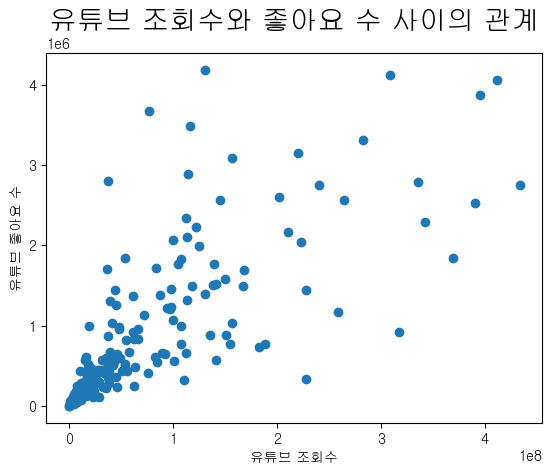

In [910]:
plt.scatter(bill_youtube['YouTube Views'],bill_youtube['YouTube Likes'])
plt.xlabel('유튜브 조회수')
plt.ylabel('유튜브 좋아요 수')
plt.title('유튜브 조회수와 좋아요 수 사이의 관계',fontsize=20)
plt.show()

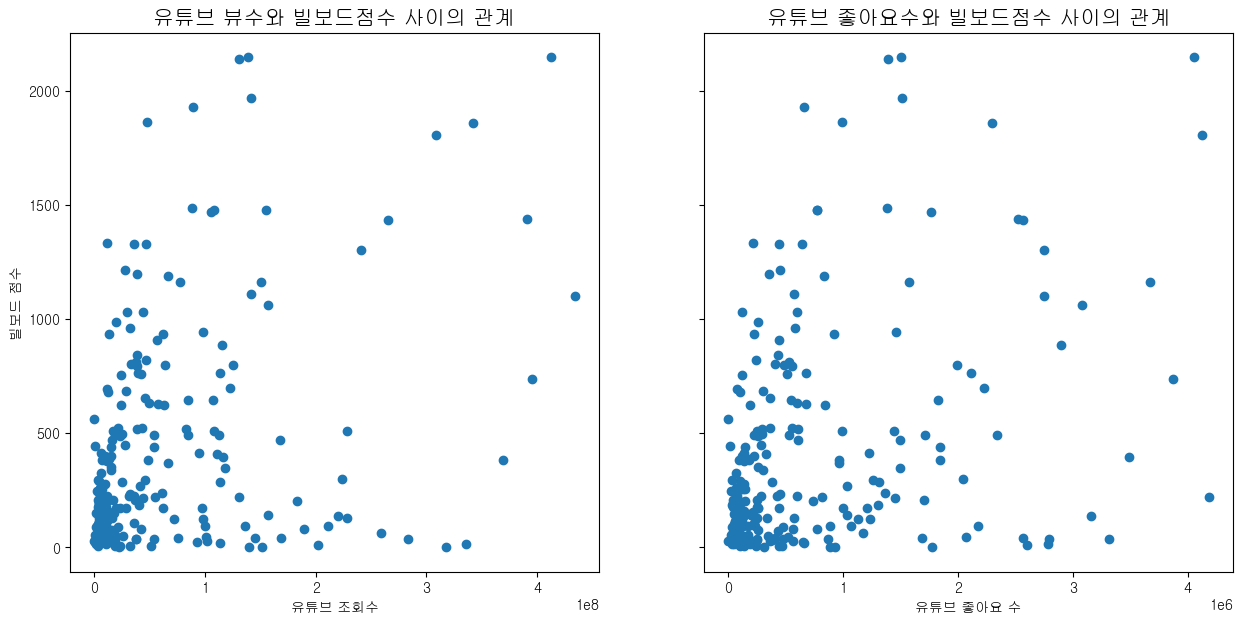

In [911]:
fig=plt.figure(figsize=(15,7))
billtube_2=fig.subplots(1,2,sharey=True)
billtube_2[0].scatter(bill_youtube['YouTube Views'],bill_youtube['score'])
billtube_2[0].set_xlabel('유튜브 조회수')
billtube_2[0].set_ylabel('빌보드 점수')
billtube_2[0].set_title('유튜브 뷰수와 빌보드점수 사이의 관계',fontsize=15)

billtube_2[1].scatter(bill_youtube['YouTube Likes'],bill_youtube['score'])
billtube_2[1].set_xlabel('유튜브 좋아요 수')
billtube_2[1].set_title('유튜브 좋아요수와 빌보드점수 사이의 관계',fontsize=15)


plt.show()